# Notebook : Image Transformations

In [1]:
%%HTML
<script src="require.js"></script>

# Sommaire <a class="anchor" id="TOC"></a>
* [I)   Importations](#chapter1)
* [II)  Opération](#chapter2)
* [III) Export](#chapter3)
* [IV)  XXX](#chapter4)
* [Fin](#END)

# I) Importations<a class="anchor" id="chapter1"></a>
* [Sommaire](#TOC)
## 1) Librairies

In [2]:
# A) Importations Librairies
## a) PATH
import sys
import os
## b) IMAGE
import pandas as pd
import scipy  as sc
import numpy  as np  # USED
import PIL    as PIL # USED
import matplotlib       as mpl
import matplotlib.image as mpimg
## c) EXCEL
import openpyxl as openpyxl
## d) OTHERS
from tqdm.notebook import tqdm
all_libs = {
    "pandas"     : pd,
    "numpy"      : np,
    "matplotlib" : mpl,
    "PIL"        : PIL,
    "scipy"      : sc,
    "openpyxl"   : openpyxl,
}
for nom,lib in all_libs.items():
    print(f"{nom:-<16} : {lib.__version__}")
    
# B) Importations Fonction
from PIL import Image
from scipy import misc
from openpyxl import Workbook, load_workbook
from openpyxl.utils import get_column_letter
from openpyxl.styles import PatternFill
from openpyxl.styles.colors import Color

pandas---------- : 1.4.2
numpy----------- : 1.21.5
matplotlib------ : 3.5.1
PIL------------- : 9.0.1
scipy----------- : 1.9.2
openpyxl-------- : 3.0.9


## 2) Paramètres
* [Sommaire](#TOC)
### A) PATH 

In [4]:
FOLDER_IMAGE = "/Image/"
NAME_IMAGE = "city2"
FORMAT_IMAGE = ".png"
PATH_IMAGE = os.path.abspath(os.path.abspath('.') + FOLDER_IMAGE + NAME_IMAGE + FORMAT_IMAGE)
print(f"Path Image : {PATH_IMAGE}")

FOLDER_EXCEL = "/ResultsTransformation/"
NAME_EXCEL = NAME_IMAGE
FORMAT_EXCEL = ".xlsx"
PATH_EXCEL = os.path.abspath (os.path.abspath('.') + FOLDER_EXCEL + NAME_EXCEL + FORMAT_EXCEL)
print(f"Path Excel : {PATH_EXCEL}")

Path Image : C:\Users\bapti\OneDrive\Bureau\ExcelMon\Image\city2.png
Path Excel : C:\Users\bapti\OneDrive\Bureau\ExcelMon\ResultsTransformation\city2.xlsx


### B) IMAGE

IMAGE ORIGINEL :
Format : PNG | Shape : (1379, 1373) | Mode : RGBA
IMAGE RESHAPE :
Format : PNG | Shape : (1379, 1373) | Mode : RGBA | Shape Numpy : (1373, 1379, 4)


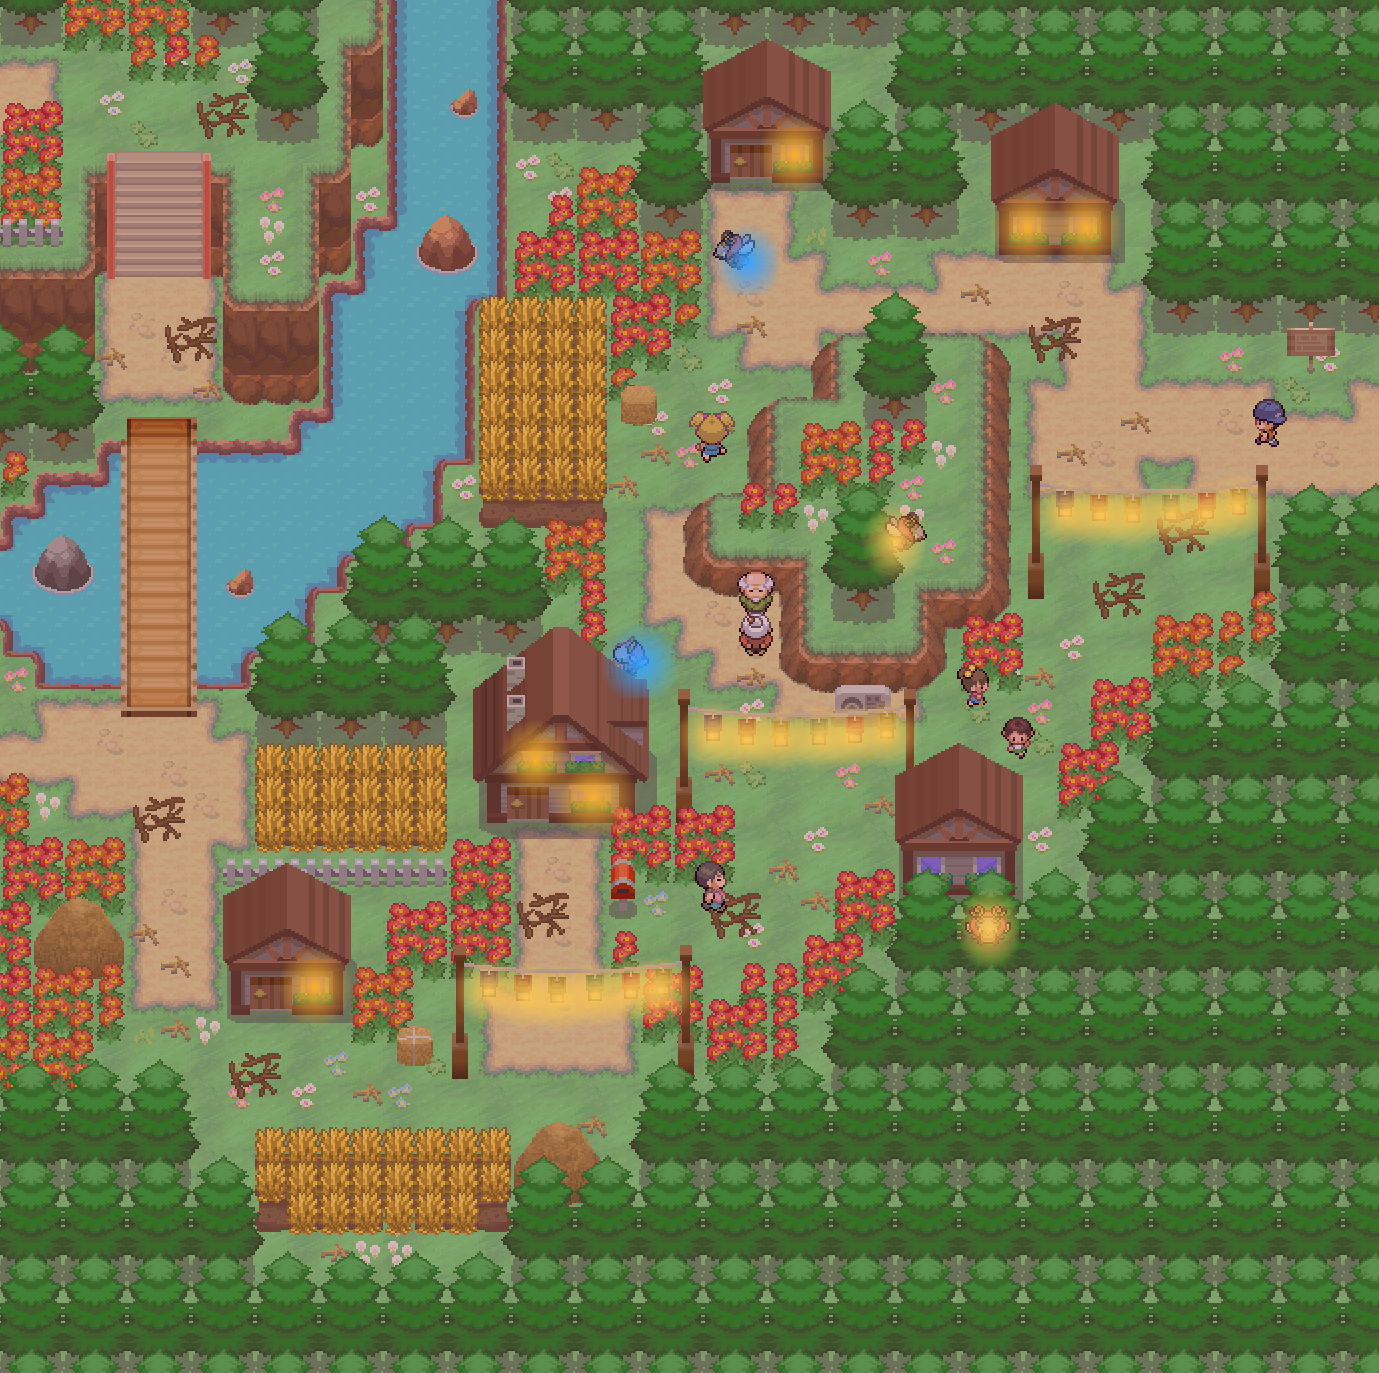

Image Transparence (Values[255]) : 


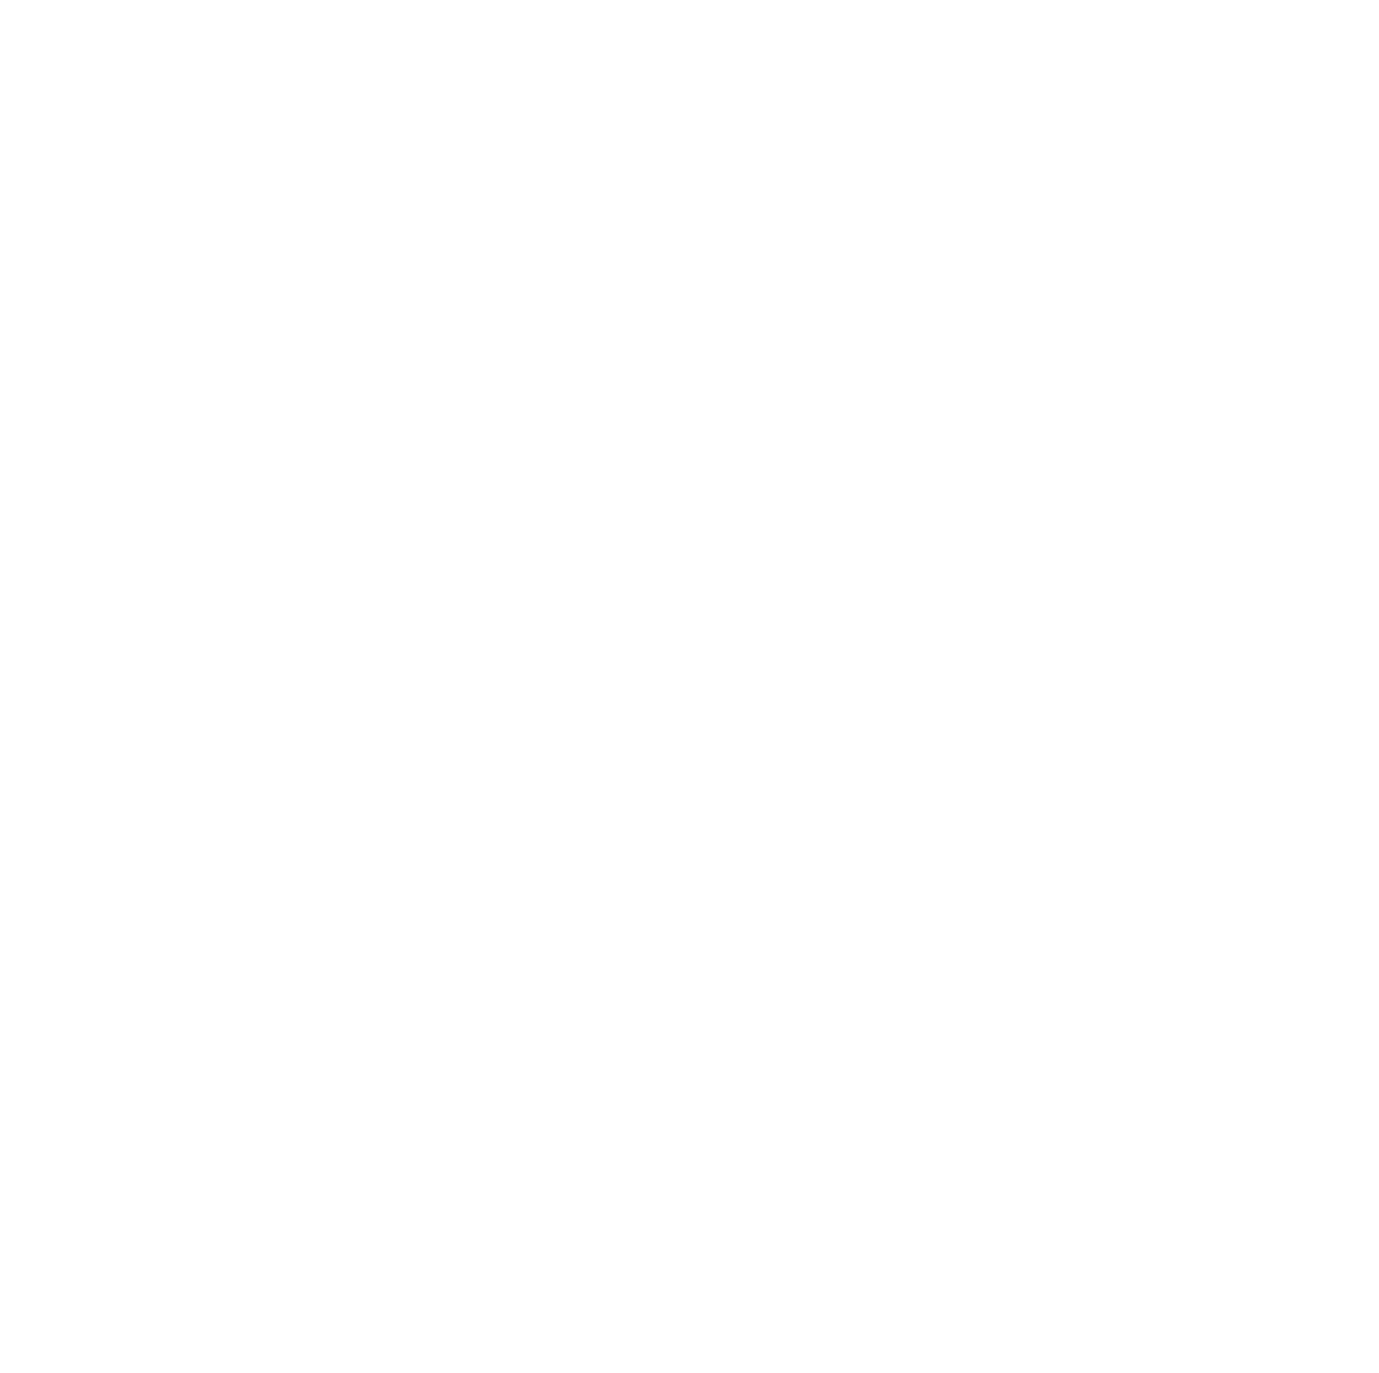

In [5]:
image = Image.open(PATH_IMAGE)
im    = Image.open(PATH_IMAGE)
divider = 1
im.thumbnail((im.size[0]/divider,im.size[1]/divider))

im_np = np.asarray(im, dtype=np.float32)

print(f"IMAGE ORIGINEL :\nFormat : {image.format} | Shape : {image.size} | Mode : {image.mode}")# Hauteur x Largeur x Pixel

print(f"IMAGE RESHAPE :\nFormat : {im.format} | Shape : {im.size} | Mode : {im.mode} | Shape Numpy : {im_np.shape}")# Hauteur x Largeur x Pixel
display(im)

if im.mode == "RGBA":
    (r, g, b, a) = im.split()
    print(f"Image Transparence (Values{np.unique(np.asarray(a))}) : ")
    display(a)
    # PIL.Image.FLIP_LEFT_RIGHT, PIL.Image.FLIP_TOP_BOTTOM, PIL.Image.ROTATE_90, PIL.Image.ROTATE_180, PIL.Image.ROTATE_270 or PIL.Image.TRANSPOSE
    # imt = im.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    # im.load()# To directly chane on the image https://en.wikibooks.org/wiki/Python_Imaging_Library/Editing_Pixels


### C) EXCEL

In [6]:
1379%16


3

In [18]:
def aRGB2hex(r,g,b,a=0):
    return f"{int(a):02x}{int(r):02x}{int(g):02x}{int(b):02x}"
def RGB2hex(r,g,b):
    return f"{int(r):02x}{int(g):02x}{int(b):02x}"

# II) Opérations <a class="anchor" id="chapter2"></a>
* [Sommaire](#TOC)

## A) Image To Excel Color

In [19]:
wb = Workbook()
ws = wb.active
ws.title = NAME_IMAGE
for hauteur in tqdm(range(im_np.shape[0])):     # hauteur => row => y
    for largeur in range(im_np.shape[1]): # largeur => col => x
        r,g,b = im_np[hauteur,largeur,0] , im_np[hauteur,largeur,1] , im_np[hauteur,largeur,2]
        if im.mode == "RGBA":
            a = im_np[hauteur,largeur,3]
        else:
            a = 255
        #aRGB_hex = aRGB2hex(r,g,b,a)
        aRGB_hex = RGB2hex(r,g,b)
        if a != 0:
            ws.cell(row = 1 + hauteur, column = 1 + largeur).fill = PatternFill(fgColor = Color(rgb = aRGB_hex),fill_type="solid")

  0%|          | 0/1200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
wb.save(PATH_EXCEL)

## B) Transparence To Point

In [25]:
taille_case = 16

wb = Workbook()
ws = wb.active
ws.title = NAME_IMAGE
for h,hauteur in enumerate(tqdm(np.arange(0,im_np.shape[0],taille_case)),1):     # hauteur => row => y
    for l,largeur in enumerate(np.arange(0,im_np.shape[1],taille_case),1): # largeur => col => x
        r,g,b = im_np[hauteur,largeur,0] , im_np[hauteur,largeur,1] , im_np[hauteur,largeur,2]
        if im.mode == "RGBA":
            a = im_np[hauteur,largeur,3]
        else:
            a = 255
        #aRGB_hex = aRGB2hex(r,g,b,a)
        aRGB_hex = RGB2hex(r,g,b)
        if a != 0:
            ws.cell(row = h, column = l).fill = PatternFill(fgColor = Color(rgb = aRGB_hex),fill_type="solid")
        else:
            ws.cell(row = h, column = l).value = "."

  0%|          | 0/75 [00:00<?, ?it/s]

In [26]:
wb.save(PATH_EXCEL)

## C) Check existing color

In [ ]:
list_rgba_color=[]
list_rgb_color=[]
for hauteur in tqdm(range(im_np.shape[0])):     # hauteur => row => y
    for largeur in range(im_np.shape[1]): # largeur => col => x
        r,g,b = im_np[hauteur,largeur,0] , im_np[hauteur,largeur,1] , im_np[hauteur,largeur,2]
        if im.mode == "RGBA":
            a = im_np[hauteur,largeur,3]
        else:
            a = 255
        list_rgba_color.append(f"{r}_{g}_{b}_{a}")  
        list_rgb_color.append(f"{r}_{g}_{b}")     

In [ ]:
pixel={
    "r":255,
    "g":0,
    "b":0,
    "a":255
}
d = pixel 
pixel_rgba = f"{d['r']}_{d['g']}_{d['b']}_{d['a']}"
pixel_rgb = f"{d['r']}_{d['g']}_{d['b']}"
print(f"{pixel_rgba} not present : {pixel_rgba not in list_rgba_color}")
print(f"{pixel_rgb} not present : {pixel_rgb not in list_rgb_color}")

# III) Save <a class="anchor" id="chapter3"></a>


# IV) XXX <a class="anchor" id="chapter4"></a>


# END <a class="anchor" id="END"></a>
* [Sommaire](#TOC)